In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

In [3]:
COLORS = [
    (0, 159/255, 232/255),
    (222/255, 28/255, 38/255),
    (0, 191/255, 82/255),
    (255/255, 122/255, 23/255)
]

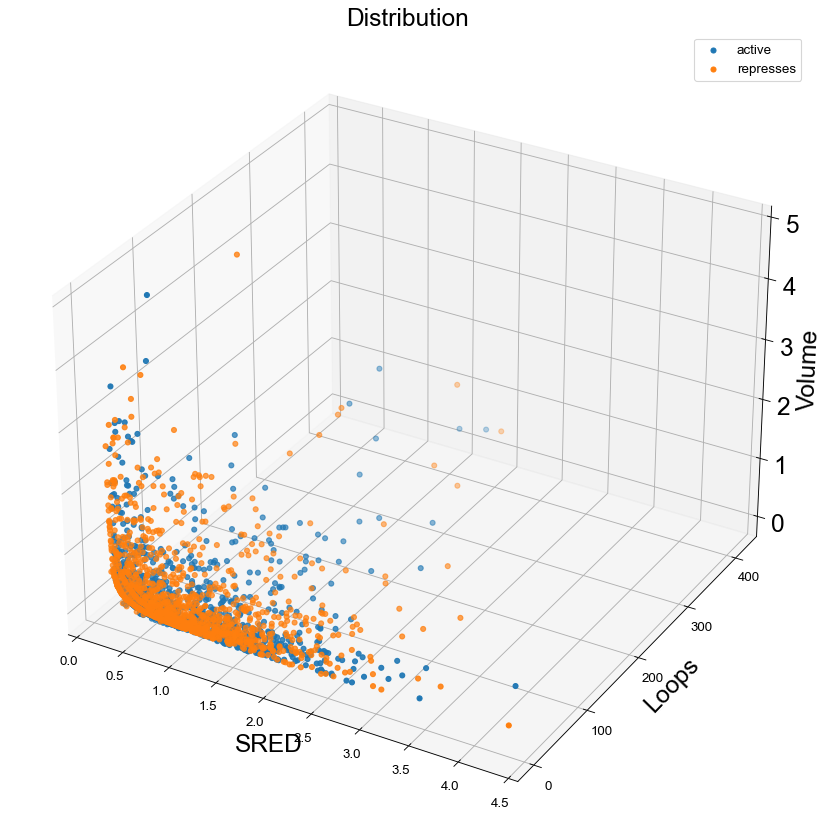

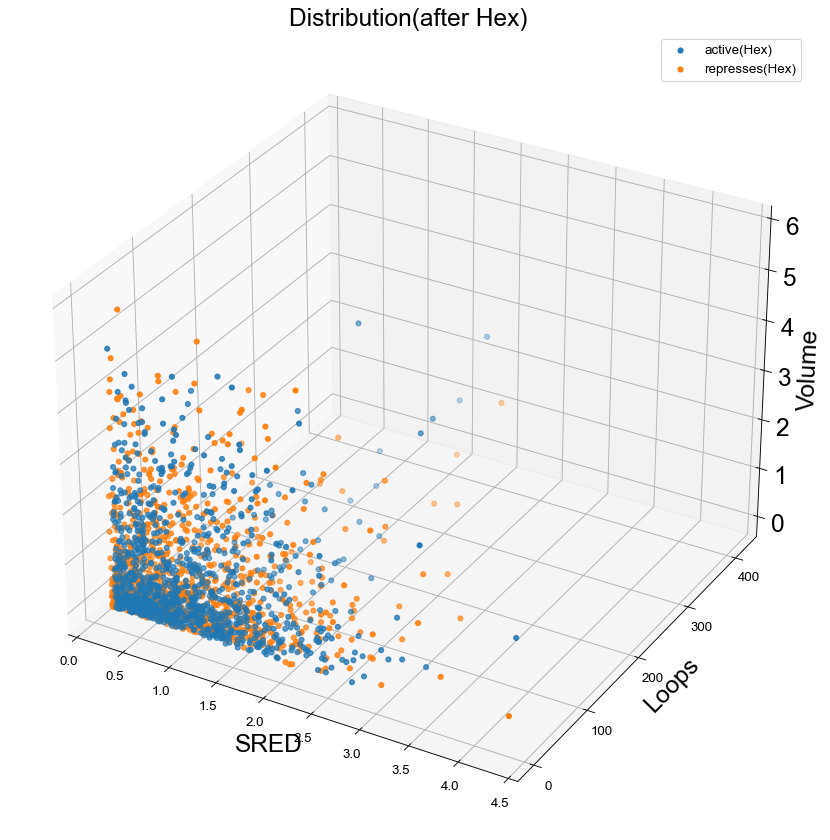

In [3]:
active_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC/result/HeLa_SDOC.tsv'
represses_SDOC_path = '/data1/lmh_data/MINE/GM12878_H3K9me3_H3K27me3/analyse/HeLa_H3K9me3_H3K27me3/experiment/SDOC/result/HeLa_SDOC.tsv'
Hex_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC_GSE138543_Hex5/result/HeLa_SDOC.tsv'

active_infos = pd.read_csv(active_SDOC_path, sep="\t", header=None)
represses_infos = pd.read_csv(represses_SDOC_path, sep="\t", header=None)
Hex_infos = pd.read_csv(Hex_SDOC_path, sep="\t", header=None)

def func(x, a, b):
    return a*np.exp(b/x)

def show(df, title):
    very_large = 24; large = 22; med = 16; small = 12
    params = {'axes.titlesize': very_large,
              'legend.fontsize': med,
              'figure.figsize': (10, 10),
              'axes.labelsize': large,
              'axes.titlesize': large,
              'xtick.labelsize': large,
              'ytick.labelsize': large,
              'figure.titlesize': very_large,
              'lines.linewidth': 2}
    plt.rcParams.update(params)
    
    font = {'family': 'sans-serif', 'sans-serif': 'Arial'}
    plt.rc('font', **font)
    
    # Prepare Data 
    categories = np.unique(df['Category'])
    colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

    # Draw Plot for Each Category
    fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
    ax = Axes3D(fig)

    for i, category in enumerate(categories):
#         plt.scatter('SRED', 'Volume', data=df.loc[df.Category==category, :], s=20, cmap=colors[i], label=str(category))
        data = df.loc[df.Category==category, :]
        data = data.loc[data.SRED>0, :]
        ax.scatter(data.SRED.values, data.Loops.values, data.Volume.values, s=20, cmap=colors[i], label=str(category))
        
    # Decorations
#     plt.gca().set(xlim=(0, 4.5), xlabel='SRED', ylabel='Volume')
    ax.set(xlim=(0, 4.5), xlabel='SRED', ylabel='Loops', zlabel='Volume')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(title, fontsize=22)
    plt.legend(fontsize=12)
    plt.show() 
    
# active_infos = active_infos.iloc[[1910, 1702, 1368, 153]]
active_infos['Category'] = 'active'
active_infos['Loops'] = active_infos.loc[:, 3]
active_infos['Volume'] = active_infos.loc[:, 4]
active_infos['SRED'] = active_infos.loc[:, 5]

Hex_active_infos = Hex_infos.copy()
Hex_active_infos['Category'] = 'active(Hex)'
Hex_active_infos['Loops'] = active_infos['Loops']
Hex_active_infos['Volume'] = Hex_active_infos.loc[:, 4]
Hex_active_infos['SRED'] = active_infos['SRED']

# represses_infos = represses_infos.iloc[[1284, 665, 2060, 448]]
represses_infos['Category'] = 'represses'
represses_infos['Loops'] = represses_infos.loc[:, 3]
represses_infos['Volume'] = represses_infos.loc[:, 4]
represses_infos['SRED'] = represses_infos.loc[:, 5]

Hex_represses_infos = Hex_infos.copy()
Hex_represses_infos['Category'] = 'represses(Hex)'
Hex_represses_infos['Loops'] = represses_infos['Loops']
Hex_represses_infos['Volume'] = Hex_represses_infos.loc[:, 4]
Hex_represses_infos['SRED'] = represses_infos['SRED']

show(pd.concat([active_infos, represses_infos], axis=0), 'Distribution')
show(pd.concat([Hex_active_infos, Hex_represses_infos], axis=0), 'Distribution(after Hex)')


[ 0.20812322 -1.23932216]


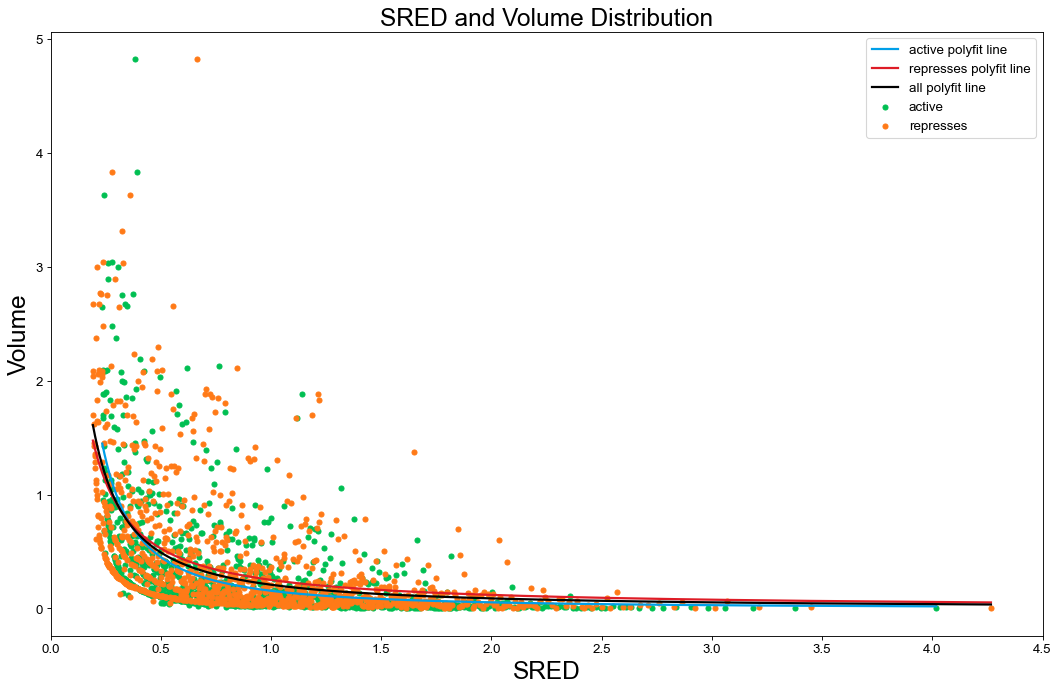

[ 0.83870843 -0.10504843]


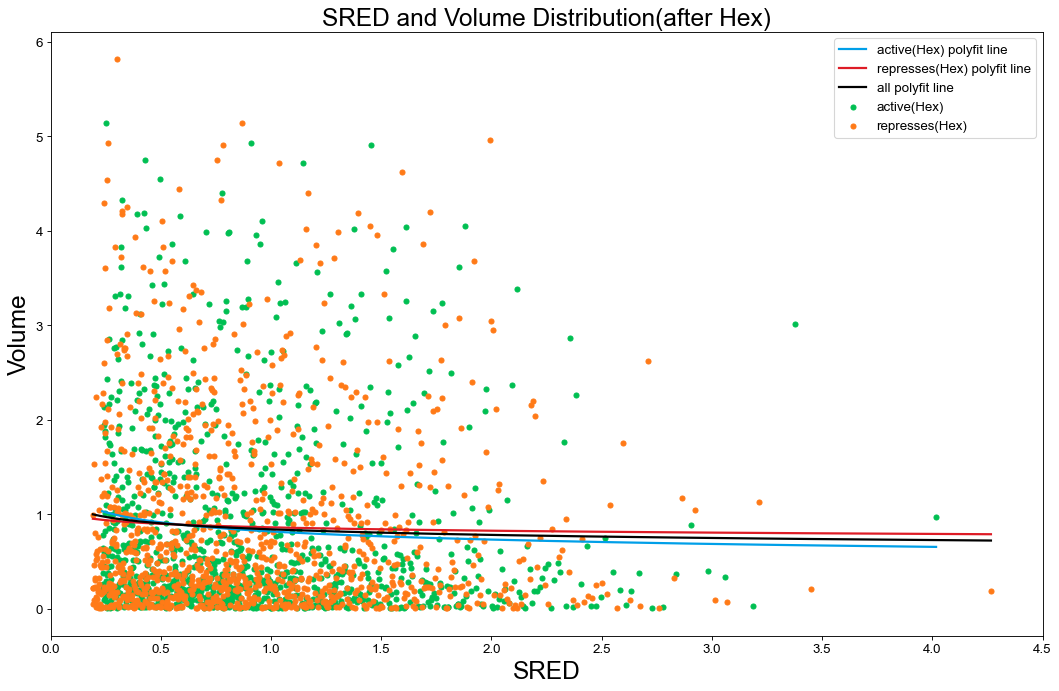

In [54]:
active_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC/result/HeLa_SDOC.tsv'
represses_SDOC_path = '/data1/lmh_data/MINE/GM12878_H3K9me3_H3K27me3/analyse/HeLa_H3K9me3_H3K27me3/experiment/SDOC/result/HeLa_SDOC.tsv'
Hex_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC_GSE138543_Hex5/result/HeLa_SDOC.tsv'

active_infos = pd.read_csv(active_SDOC_path, sep="\t", header=None)
represses_infos = pd.read_csv(represses_SDOC_path, sep="\t", header=None)
Hex_infos = pd.read_csv(Hex_SDOC_path, sep="\t", header=None)

def show(df, title, colors):
    very_large = 24; large = 22; med = 16; small = 12
    params = {'axes.titlesize': very_large,
              'legend.fontsize': med,
              'figure.figsize': (10, 10),
              'axes.labelsize': large,
              'axes.titlesize': large,
              'xtick.labelsize': large,
              'ytick.labelsize': large,
              'figure.titlesize': very_large,
              'lines.linewidth': 2}
    plt.rcParams.update(params)
    
    font = {'family': 'sans-serif', 'sans-serif': 'Arial'}
    plt.rc('font', **font)
    
    # Prepare Data 
    categories = np.unique(df['Category'])

    # Draw Plot for Each Category
    fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

    for i, category in enumerate(categories):
        plt.scatter('SRED', 'Volume', data=df.loc[df.Category==category, :], s=20, color=colors[category], label=str(category))
    
    ### 定义拟合函数, y = a * x^b + c ###
    def target_func(x, a, b):
        return a * (x ** b)
    
    data = df.loc[df.SRED>0, :].copy()
#     data = data.loc[data.SRED<3, :].copy()
    data.sort_values('SRED', inplace=True)
    for i, category in enumerate(categories):
        _data = data.loc[data.Category==category, :]
        _color = COLORS[0] if category[:6] == 'active' else COLORS[1]
        popt, pcov = curve_fit(target_func, _data.SRED.values, _data.Volume.values, maxfev=50000000)
        calc_ydata = [target_func(i, popt[0], popt[1]) for i in _data.SRED.values]
        plt.plot(_data.SRED.values, calc_ydata, color=_color, label='{} polyfit line'.format(category))
    
    popt, pcov = curve_fit(target_func, data.SRED.values, data.Volume.values, maxfev=50000000)
    calc_ydata = [target_func(i, popt[0], popt[1]) for i in data.SRED.values]
    plt.plot(data.SRED.values, calc_ydata, 'black', label='all polyfit line')
    print(popt)
    
    # Decorations
    plt.gca().set(xlim=(0, 4.5), xlabel='SRED', ylabel='Volume')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(title, fontsize=22)
    plt.legend(fontsize=12)
    plt.savefig('figure_file/{}.pdf'.format(title))
    plt.show() 

_colors = {
    'active': COLORS[2],
    'represses': COLORS[3],
    'active(Hex)': COLORS[2],
    'represses(Hex)': COLORS[3],
}

active_infos['Category'] = 'active'
active_infos['Volume'] = active_infos.loc[:, 4]
active_infos['SRED'] = active_infos.loc[:, 5]

represses_infos['Category'] = 'represses'
represses_infos['Volume'] = represses_infos.loc[:, 4]
represses_infos['SRED'] = represses_infos.loc[:, 5]

show(pd.concat([active_infos, represses_infos], axis=0), 'SRED and Volume Distribution', _colors)

Hex_active_infos = Hex_infos.copy()
Hex_active_infos['Category'] = 'active(Hex)'
Hex_active_infos['Volume'] = Hex_active_infos.loc[:, 4]
Hex_active_infos['SRED'] = active_infos['SRED']

Hex_represses_infos = Hex_infos.copy()
Hex_represses_infos['Category'] = 'represses(Hex)'
Hex_represses_infos['Volume'] = Hex_represses_infos.loc[:, 4]
Hex_represses_infos['SRED'] = represses_infos['SRED']

show(pd.concat([Hex_active_infos, Hex_represses_infos], axis=0), 'SRED and Volume Distribution(after Hex)', _colors)

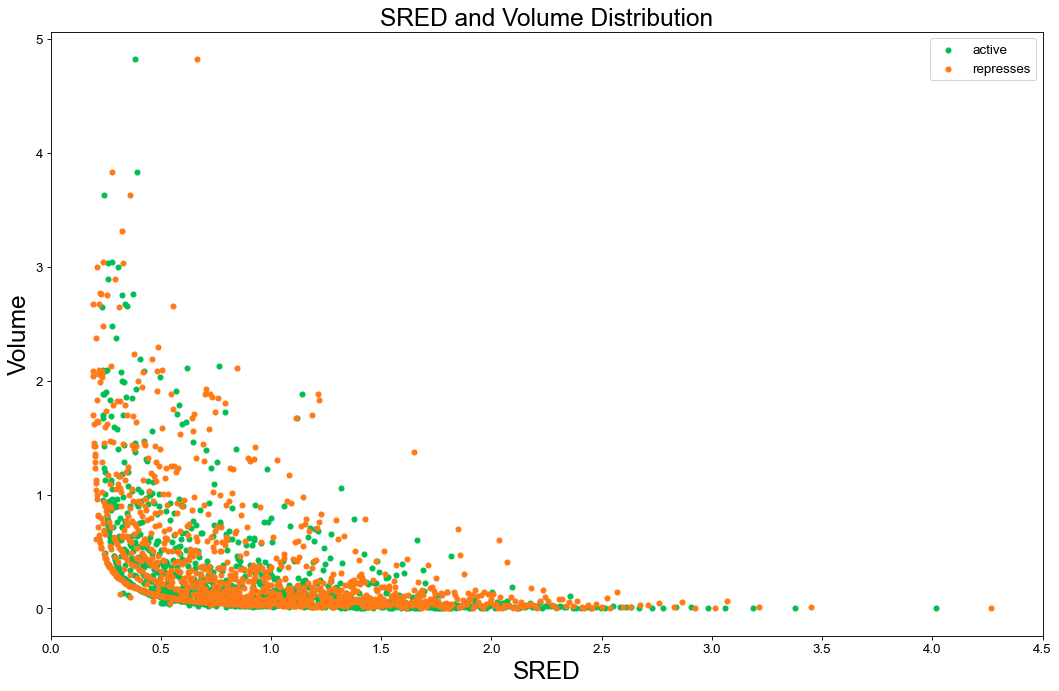

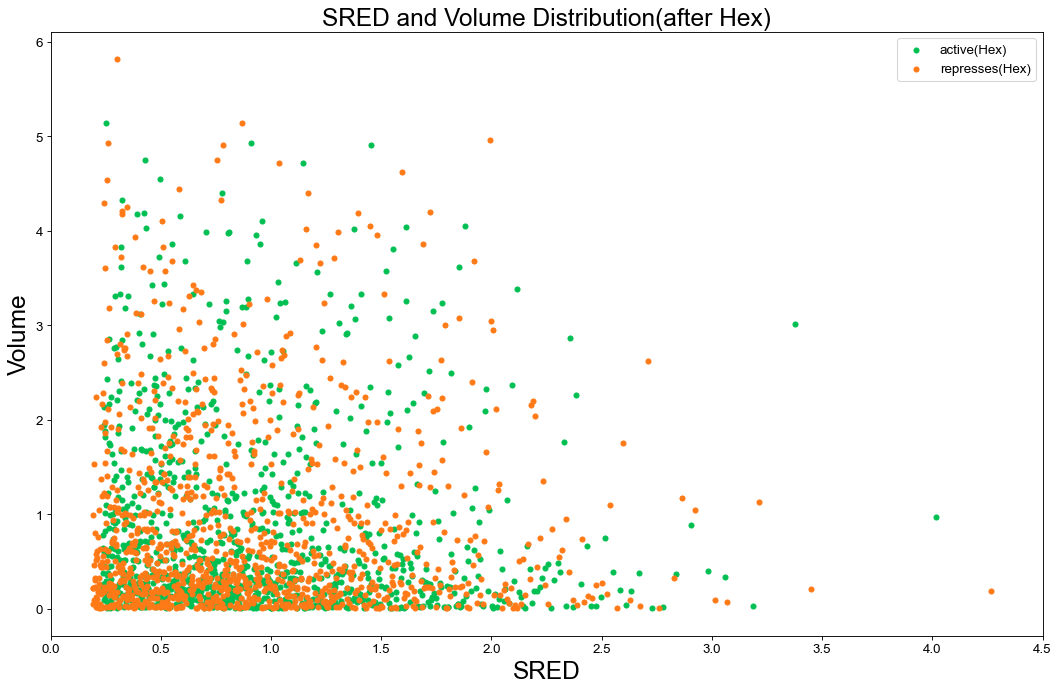

In [39]:
active_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC/result/HeLa_SDOC.tsv'
represses_SDOC_path = '/data1/lmh_data/MINE/GM12878_H3K9me3_H3K27me3/analyse/HeLa_H3K9me3_H3K27me3/experiment/SDOC/result/HeLa_SDOC.tsv'
Hex_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC_GSE138543_Hex5/result/HeLa_SDOC.tsv'

active_infos = pd.read_csv(active_SDOC_path, sep="\t", header=None)
represses_infos = pd.read_csv(represses_SDOC_path, sep="\t", header=None)
Hex_infos = pd.read_csv(Hex_SDOC_path, sep="\t", header=None)

def show(df, title, colors):
    very_large = 24; large = 22; med = 16; small = 12
    params = {'axes.titlesize': very_large,
              'legend.fontsize': med,
              'figure.figsize': (10, 10),
              'axes.labelsize': large,
              'axes.titlesize': large,
              'xtick.labelsize': large,
              'ytick.labelsize': large,
              'figure.titlesize': very_large,
              'lines.linewidth': 2}
    plt.rcParams.update(params)
    
    font = {'family': 'sans-serif', 'sans-serif': 'Arial'}
    plt.rc('font', **font)
    
    # Prepare Data 
    categories = np.unique(df['Category'])

    # Draw Plot for Each Category
    fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

    for i, category in enumerate(categories):
        plt.scatter('SRED', 'Volume', data=df.loc[df.Category==category, :], s=20, color=colors[category], label=str(category))
    
    # Decorations
    plt.gca().set(xlim=(0, 4.5), xlabel='SRED', ylabel='Volume')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(title, fontsize=22)
    plt.legend(fontsize=12)
#     plt.savefig('figure_file/{}.pdf'.format(title))
    plt.show() 

_colors = {
    'active': COLORS[2],
    'represses': COLORS[3],
    'active(Hex)': COLORS[2],
    'represses(Hex)': COLORS[3],
}
    
# active_infos = active_infos.iloc[[1910, 1702, 1368, 153]]
active_infos['Category'] = 'active'
active_infos['Volume'] = active_infos.loc[:, 4]
active_infos['SRED'] = active_infos.loc[:, 5]

Hex_active_infos = Hex_infos.copy()
Hex_active_infos['Category'] = 'active(Hex)'
Hex_active_infos['Volume'] = Hex_active_infos.loc[:, 4]
Hex_active_infos['SRED'] = active_infos['SRED']

# represses_infos = represses_infos.iloc[[1284, 665, 2060, 448]]
represses_infos['Category'] = 'represses'
represses_infos['Volume'] = represses_infos.loc[:, 4]
represses_infos['SRED'] = represses_infos.loc[:, 5]

Hex_represses_infos = Hex_infos.copy()
Hex_represses_infos['Category'] = 'represses(Hex)'
Hex_represses_infos['Volume'] = Hex_represses_infos.loc[:, 4]
Hex_represses_infos['SRED'] = represses_infos['SRED']

show(pd.concat([active_infos, represses_infos], axis=0), 'SRED and Volume Distribution', _colors)
show(pd.concat([Hex_active_infos, Hex_represses_infos], axis=0), 'SRED and Volume Distribution(after Hex)', _colors)


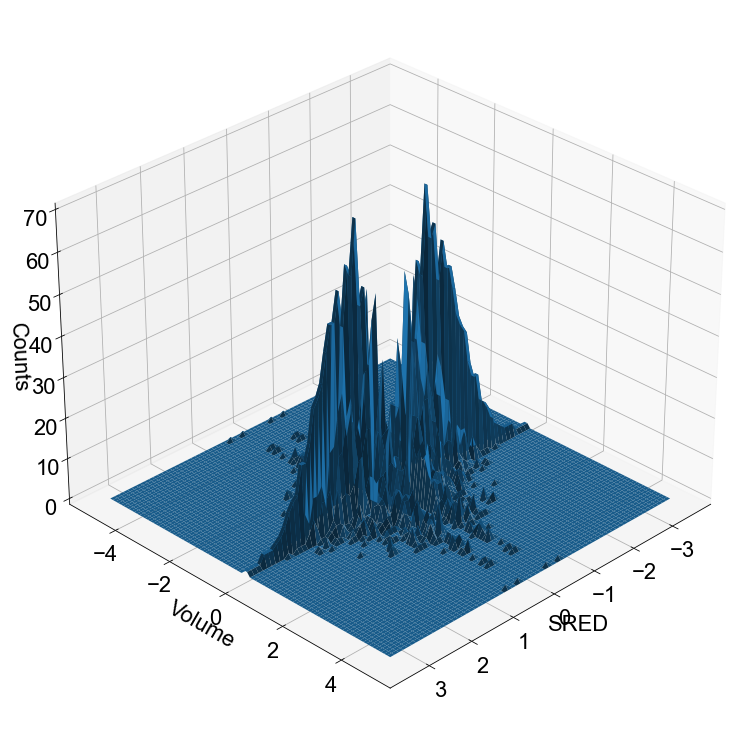

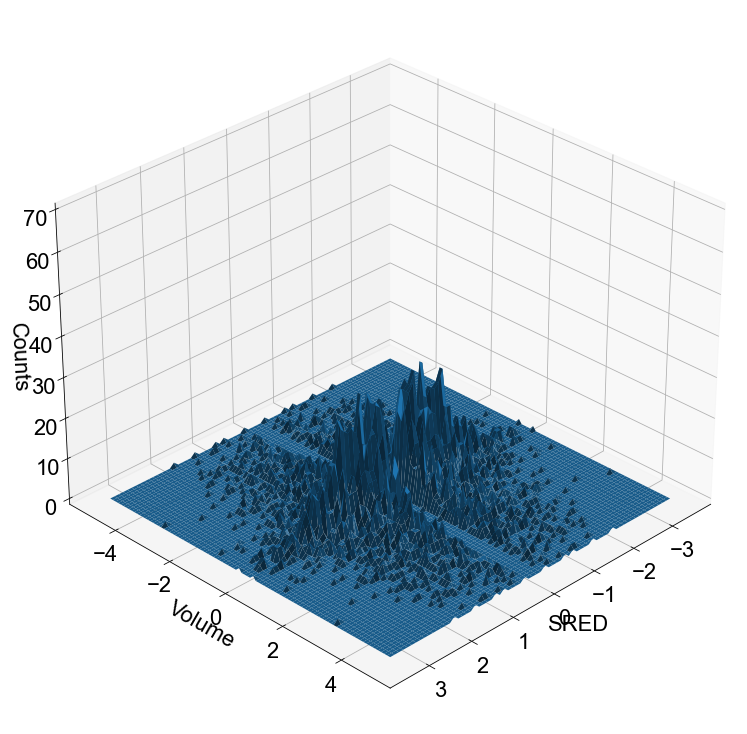

In [40]:
xmin, xmax, xstride = -3.5, 3.5, 0.1
ymin, ymax, ystride = -5.0, 5.0, 0.1

def show(df, azim):
    fig = plt.figure(figsize=(10,10)) #创建一张图片
    ax3d = Axes3D(fig)

    x, y = np.arange(xmin,xmax,xstride), np.arange(ymin,ymax,ystride)
    # z is the count in the bin
    def f(x, y):
        z = np.zeros(x.shape)
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                z[i, j] = len(df.loc[(df['SRED']>x[i,j])&(df['SRED']<(x[i,j]+xstride))&(df['Volume']>y[i,j])&(df['Volume']<(y[i,j]+ystride))])
        return z
    x,y = np.meshgrid(x,y)
    ax3d.view_init(azim=azim, elev=30)
    ax3d.plot_surface(x,y,f(x,y),rstride=1,cstride=1)#cmap还可以是summer autumn winter也可以自己配置
    #rstride    Array row stride (step size)    步长
    #cstride    Array column stride (step size)
    ax3d.set_xlabel('SRED')
    ax3d.set_ylabel('Volume')
    ax3d.set_zlabel('Counts')
    ax3d.set_zlim(0, 70)
    plt.show()

active_infos = active_infos.loc[active_infos['SRED']>0].copy()
represses_infos = represses_infos.loc[represses_infos['SRED']>0].copy()
Hex_active_infos = Hex_active_infos.loc[Hex_active_infos['SRED']>0].copy()
Hex_represses_infos = Hex_represses_infos.loc[Hex_represses_infos['SRED']>0].copy()

# import pdb; pdb.set_trace()

def get_image(df):
    df1 = df.copy()
    df1['SRED'] *= -1
    df2 = df.copy()
    df2['Volume'] *= -1
    df3 = df.copy()
    df3['SRED'] *= -1
    df3['Volume'] *= -1
    return pd.concat([df, df1, df2, df3], axis=0)

active_infos = get_image(active_infos)
represses_infos = get_image(represses_infos)
Hex_active_infos = get_image(Hex_active_infos)
Hex_represses_infos = get_image(Hex_represses_infos)

show(pd.concat([active_infos, represses_infos], axis=0), azim=45)
show(pd.concat([Hex_active_infos, Hex_represses_infos], axis=0), azim=45)

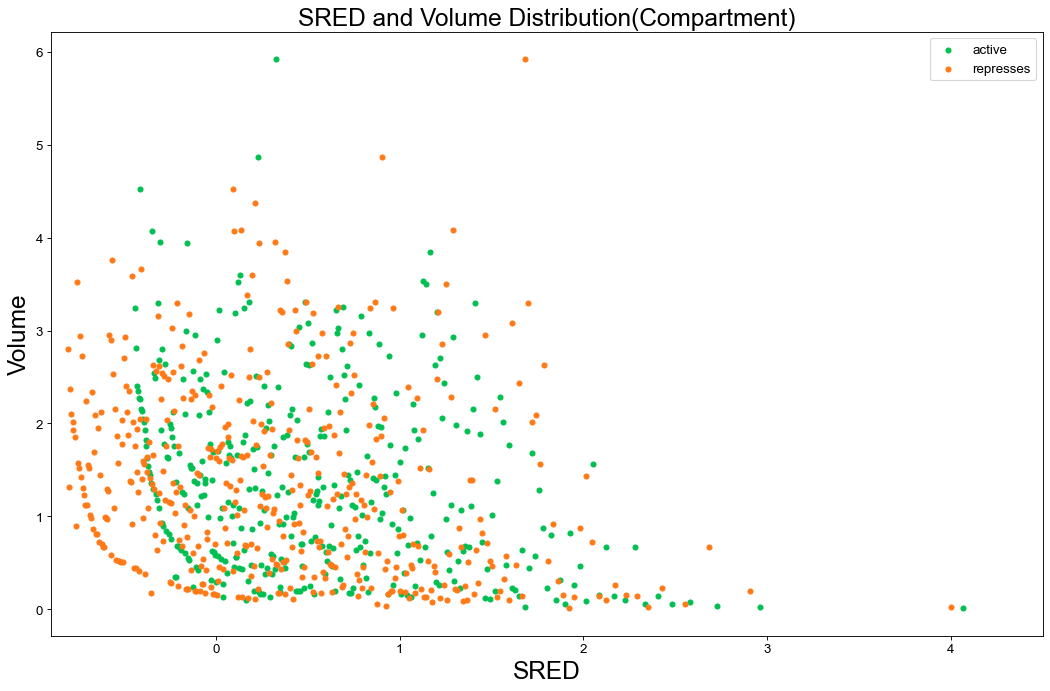

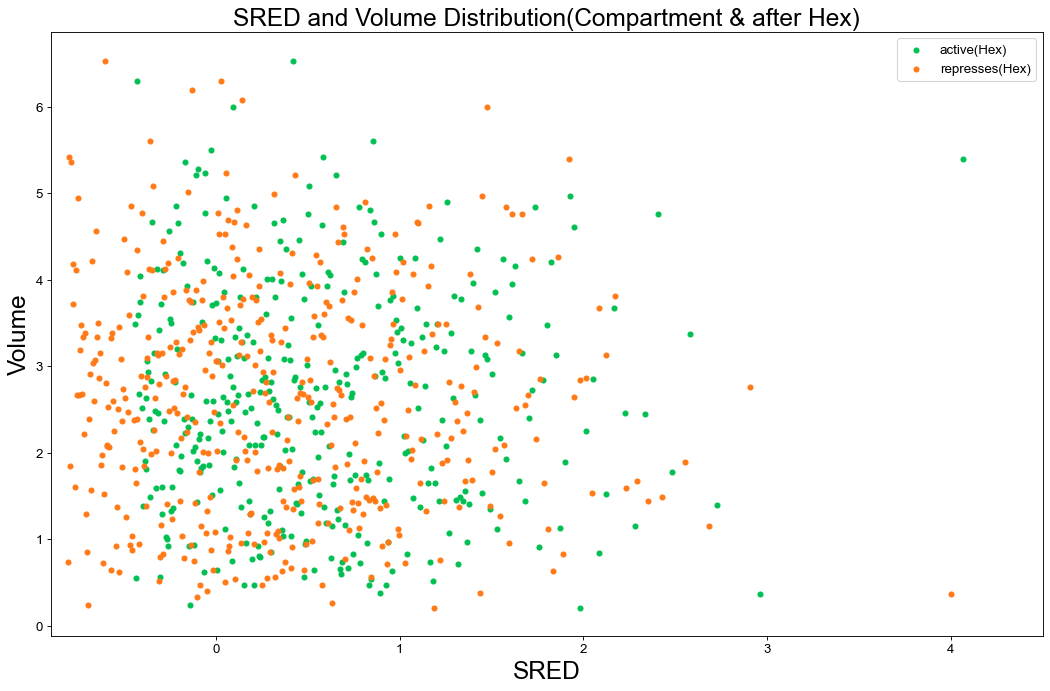

In [50]:
# 1MB 10KB
active_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC_1MB/result/HeLa_SDOC.tsv'
represses_SDOC_path = '/data1/lmh_data/MINE/GM12878_H3K9me3_H3K27me3/analyse/HeLa_H3K9me3_H3K27me3/experiment/SDOC_1MB/result/HeLa_SDOC.tsv'
Hex_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC_GSE138543_Hex5_1MB/result/HeLa_SDOC.tsv'

active_infos = pd.read_csv(active_SDOC_path, sep="\t", header=None)
represses_infos = pd.read_csv(represses_SDOC_path, sep="\t", header=None)
Hex_infos = pd.read_csv(Hex_SDOC_path, sep="\t", header=None)

def show(df, title, colors):
    very_large = 24; large = 22; med = 16; small = 12
    params = {'axes.titlesize': very_large,
              'legend.fontsize': med,
              'figure.figsize': (10, 10),
              'axes.labelsize': large,
              'axes.titlesize': large,
              'xtick.labelsize': large,
              'ytick.labelsize': large,
              'figure.titlesize': very_large,
              'lines.linewidth': 2}
    plt.rcParams.update(params)
    
    font = {'family': 'sans-serif', 'sans-serif': 'Arial'}
    plt.rc('font', **font)
    
    # Prepare Data 
    categories = np.unique(df['Category'])

    # Draw Plot for Each Category
    fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

    for i, category in enumerate(categories):
        plt.scatter('SRED', 'Volume', data=df.loc[df.Category==category, :], s=20, color=colors[category], label=str(category))
    
    # Decorations
    plt.gca().set(xlim=(-0.9, 4.5), xlabel='SRED', ylabel='Volume')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(title, fontsize=22)
    plt.legend(fontsize=12)
#     plt.savefig('figure_file/{}.pdf'.format(title))
    plt.show() 

_colors = {
    'active': COLORS[2],
    'represses': COLORS[3],
    'active(Hex)': COLORS[2],
    'represses(Hex)': COLORS[3],
}
    
# active_infos = active_infos.iloc[[1910, 1702, 1368, 153]]
active_infos['Category'] = 'active'
active_infos['Volume'] = active_infos.loc[:, 4]
active_infos['SRED'] = active_infos.loc[:, 5]

Hex_active_infos = Hex_infos.copy()
Hex_active_infos['Category'] = 'active(Hex)'
Hex_active_infos['Volume'] = Hex_active_infos.loc[:, 4]
Hex_active_infos['SRED'] = active_infos['SRED']

# represses_infos = represses_infos.iloc[[1284, 665, 2060, 448]]
represses_infos['Category'] = 'represses'
represses_infos['Volume'] = represses_infos.loc[:, 4]
represses_infos['SRED'] = represses_infos.loc[:, 5]

Hex_represses_infos = Hex_infos.copy()
Hex_represses_infos['Category'] = 'represses(Hex)'
Hex_represses_infos['Volume'] = Hex_represses_infos.loc[:, 4]
Hex_represses_infos['SRED'] = represses_infos['SRED']

show(pd.concat([active_infos, represses_infos], axis=0), 'SRED and Volume Distribution(Compartment)', _colors)
show(pd.concat([Hex_active_infos, Hex_represses_infos], axis=0), 'SRED and Volume Distribution(Compartment & after Hex)', _colors)


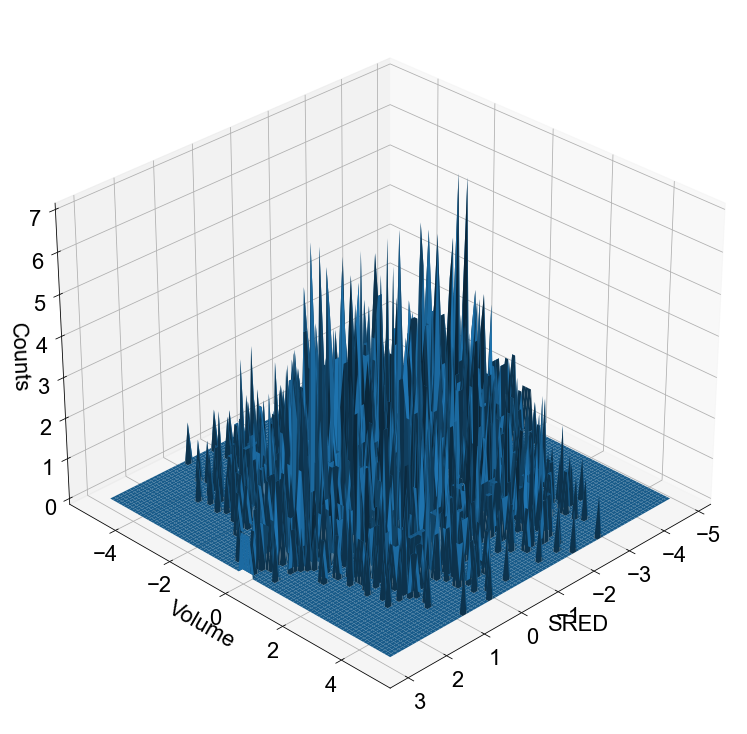

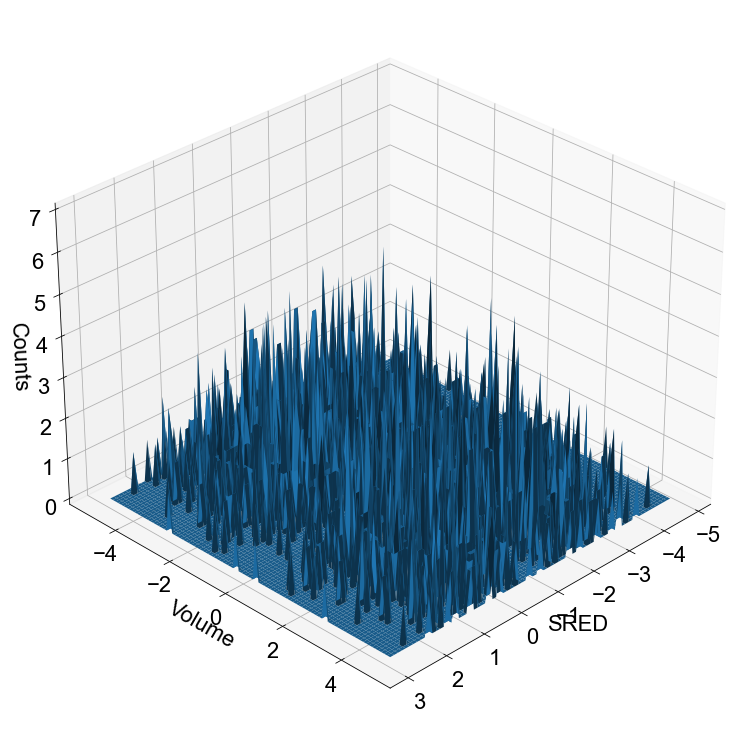

In [51]:
xmin, xmax, xstride = -4.8, 3.0, 0.1
ymin, ymax, ystride = -5.0, 5.0, 0.1

def show(df, azim):
    fig = plt.figure(figsize=(10,10)) #创建一张图片
    ax3d = Axes3D(fig)

    x, y = np.arange(xmin,xmax,xstride), np.arange(ymin,ymax,ystride)
    # z is the count in the bin
    def f(x, y):
        z = np.zeros(x.shape)
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                z[i, j] = len(df.loc[(df['SRED']>x[i,j])&(df['SRED']<(x[i,j]+xstride))&(df['Volume']>y[i,j])&(df['Volume']<(y[i,j]+ystride))])
        return z
    x,y = np.meshgrid(x,y)
    ax3d.view_init(azim=azim, elev=30)
    ax3d.plot_surface(x,y,f(x,y),rstride=1,cstride=1)#cmap还可以是summer autumn winter也可以自己配置
    #rstride    Array row stride (step size)    步长
    #cstride    Array column stride (step size)
    ax3d.set_xlabel('SRED')
    ax3d.set_ylabel('Volume')
    ax3d.set_zlabel('Counts')
    ax3d.set_zlim(0, 7)
    plt.show()

active_infos = active_infos.loc[active_infos['SRED']>-0.9].copy()
represses_infos = represses_infos.loc[represses_infos['SRED']>-0.9].copy()
Hex_active_infos = Hex_active_infos.loc[Hex_active_infos['SRED']>-0.9].copy()
Hex_represses_infos = Hex_represses_infos.loc[Hex_represses_infos['SRED']>-0.9].copy()

# import pdb; pdb.set_trace()

def get_image(df):
    df1 = df.copy()
    df1['SRED'] *= -1
    df1['SRED'] -= 1.8
    df2 = df.copy()
    df2['Volume'] *= -1
    df3 = df.copy()
    df3['SRED'] *= -1
    df3['SRED'] -= 1.8
    df3['Volume'] *= -1
    return pd.concat([df, df1, df2, df3], axis=0)

active_infos = get_image(active_infos)
represses_infos = get_image(represses_infos)
Hex_active_infos = get_image(Hex_active_infos)
Hex_represses_infos = get_image(Hex_represses_infos)

show(pd.concat([active_infos, represses_infos], axis=0), azim=45)
show(pd.concat([Hex_active_infos, Hex_represses_infos], axis=0), azim=45)

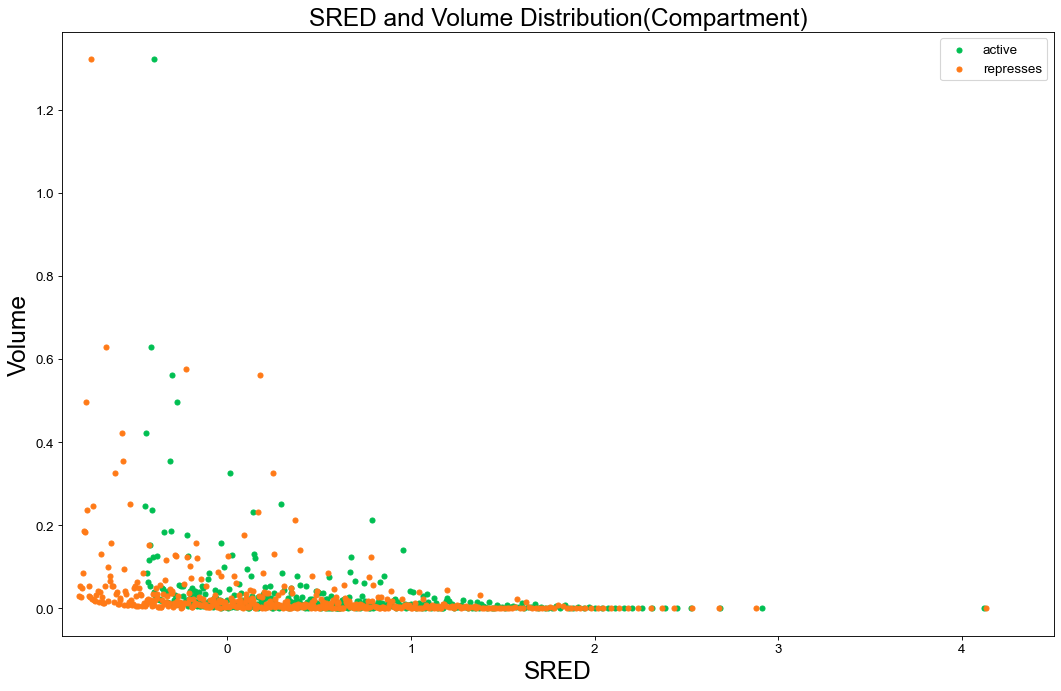

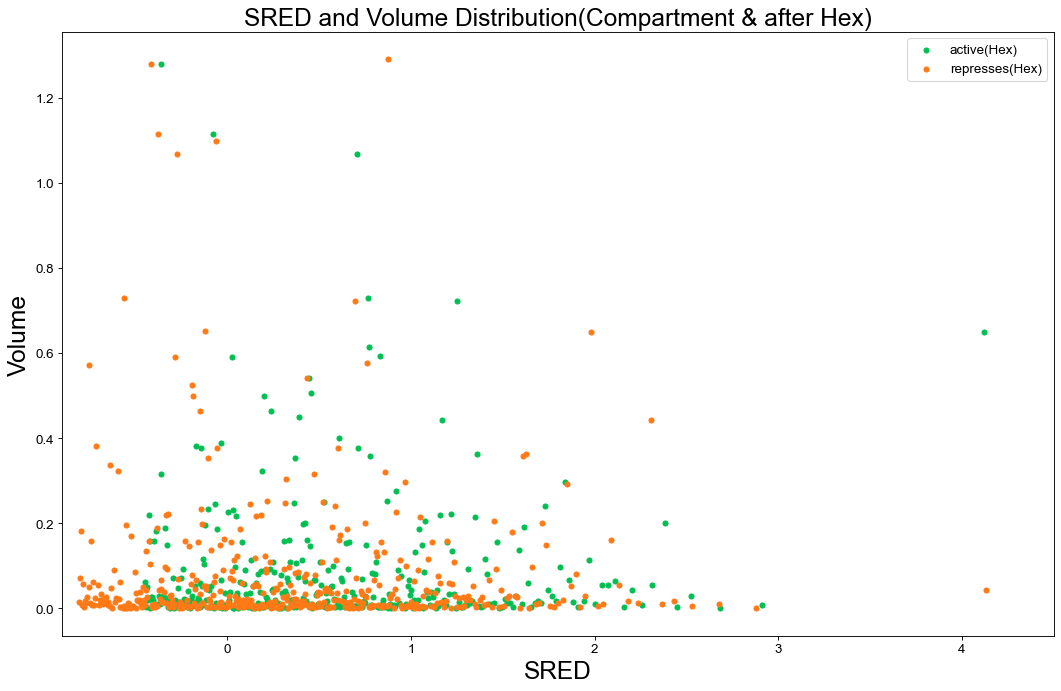

In [72]:
# 1MB 100KB
active_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC_1MB_new/result/HeLa_SDOC.tsv'
represses_SDOC_path = '/data1/lmh_data/MINE/GM12878_H3K9me3_H3K27me3/analyse/HeLa_H3K9me3_H3K27me3/experiment/SDOC_1MB_new/result/HeLa_SDOC.tsv'
Hex_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC_GSE138543_Hex5_1MB_new/result/HeLa_SDOC.tsv'

active_infos = pd.read_csv(active_SDOC_path, sep="\t", header=None)
represses_infos = pd.read_csv(represses_SDOC_path, sep="\t", header=None)
Hex_infos = pd.read_csv(Hex_SDOC_path, sep="\t", header=None)

def show(df, title, colors):
    very_large = 24; large = 22; med = 16; small = 12
    params = {'axes.titlesize': very_large,
              'legend.fontsize': med,
              'figure.figsize': (10, 10),
              'axes.labelsize': large,
              'axes.titlesize': large,
              'xtick.labelsize': large,
              'ytick.labelsize': large,
              'figure.titlesize': very_large,
              'lines.linewidth': 2}
    plt.rcParams.update(params)
    
    font = {'family': 'sans-serif', 'sans-serif': 'Arial'}
    plt.rc('font', **font)
    
    # Prepare Data 
    categories = np.unique(df['Category'])

    # Draw Plot for Each Category
    fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

    for i, category in enumerate(categories):
        plt.scatter('SRED', 'Volume', data=df.loc[df.Category==category, :], s=20, color=colors[category], label=str(category))
    
    # Decorations
    plt.gca().set(xlim=(-0.9, 4.5), xlabel='SRED', ylabel='Volume')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(title, fontsize=22)
    plt.legend(fontsize=12)
#     plt.savefig('figure_file/{}.pdf'.format(title))
    plt.show() 

_colors = {
    'active': COLORS[2],
    'represses': COLORS[3],
    'active(Hex)': COLORS[2],
    'represses(Hex)': COLORS[3],
}
    
# active_infos = active_infos.iloc[[1910, 1702, 1368, 153]]
active_infos['Category'] = 'active'
active_infos['Volume'] = active_infos.loc[:, 4]
active_infos['SRED'] = active_infos.loc[:, 5]

Hex_active_infos = Hex_infos.copy()
Hex_active_infos['Category'] = 'active(Hex)'
Hex_active_infos['Volume'] = Hex_active_infos.loc[:, 4]
Hex_active_infos['SRED'] = active_infos['SRED']

# represses_infos = represses_infos.iloc[[1284, 665, 2060, 448]]
represses_infos['Category'] = 'represses'
represses_infos['Volume'] = represses_infos.loc[:, 4]
represses_infos['SRED'] = represses_infos.loc[:, 5]

Hex_represses_infos = Hex_infos.copy()
Hex_represses_infos['Category'] = 'represses(Hex)'
Hex_represses_infos['Volume'] = Hex_represses_infos.loc[:, 4]
Hex_represses_infos['SRED'] = represses_infos['SRED']

show(pd.concat([active_infos, represses_infos], axis=0), 'SRED and Volume Distribution(Compartment)', _colors)
show(pd.concat([Hex_active_infos, Hex_represses_infos], axis=0), 'SRED and Volume Distribution(Compartment & after Hex)', _colors)


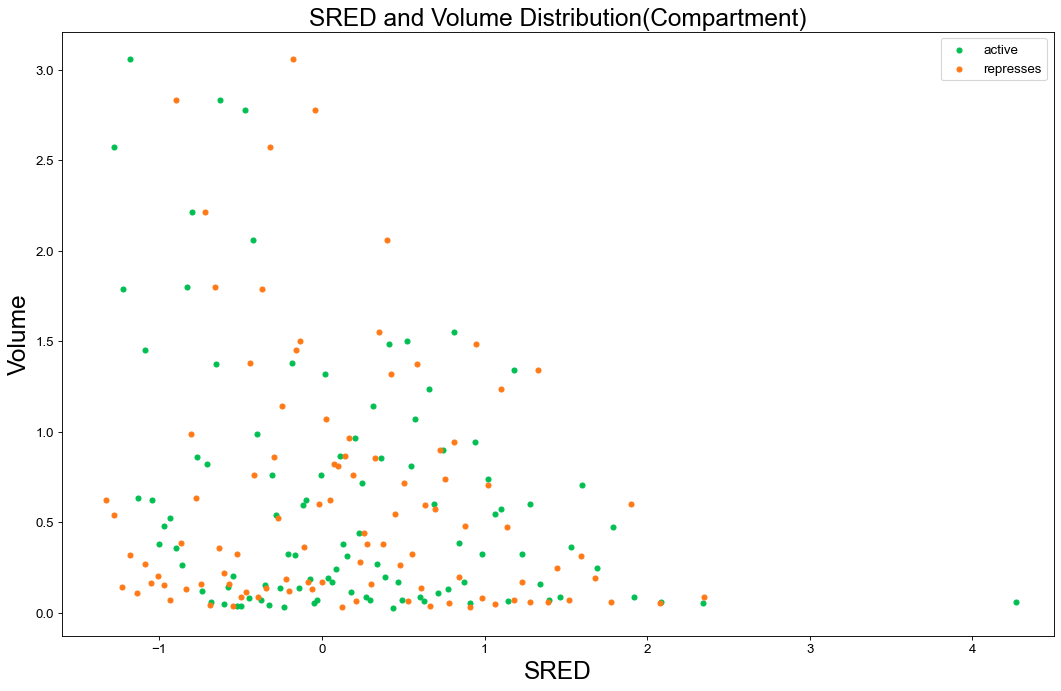

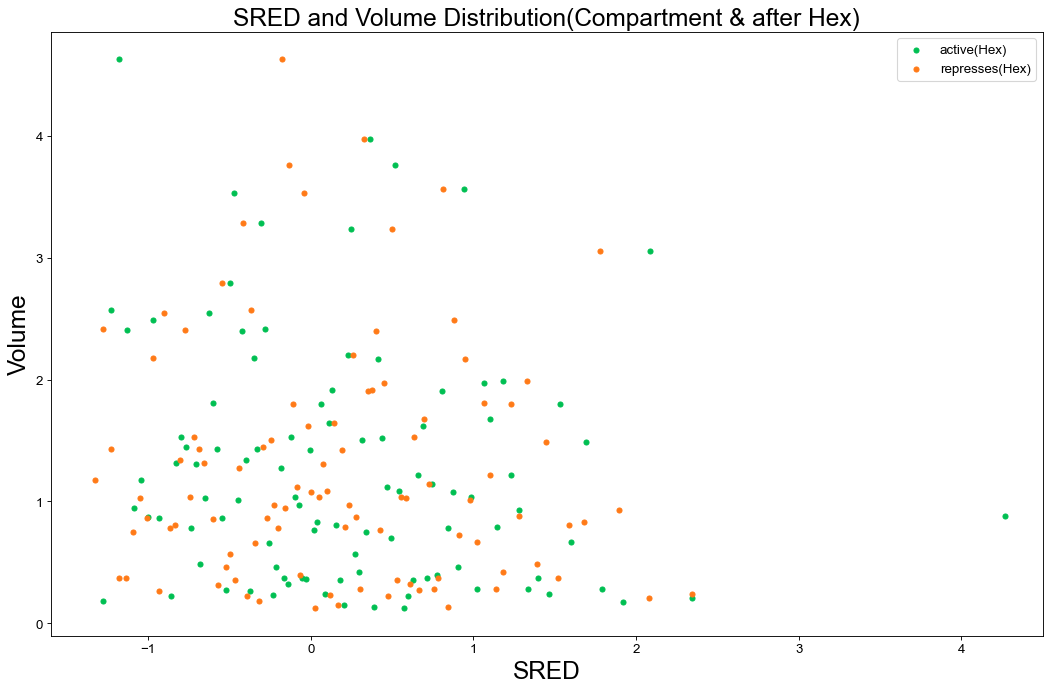

In [52]:
# 5MB 50KB
active_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC_5MB/result/HeLa_SDOC.tsv'
represses_SDOC_path = '/data1/lmh_data/MINE/GM12878_H3K9me3_H3K27me3/analyse/HeLa_H3K9me3_H3K27me3/experiment/SDOC_5MB/result/HeLa_SDOC.tsv'
Hex_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC_GSE138543_Hex5_5MB/result/HeLa_SDOC.tsv'

active_infos = pd.read_csv(active_SDOC_path, sep="\t", header=None)
represses_infos = pd.read_csv(represses_SDOC_path, sep="\t", header=None)
Hex_infos = pd.read_csv(Hex_SDOC_path, sep="\t", header=None)

def show(df, title, colors):
    very_large = 24; large = 22; med = 16; small = 12
    params = {'axes.titlesize': very_large,
              'legend.fontsize': med,
              'figure.figsize': (10, 10),
              'axes.labelsize': large,
              'axes.titlesize': large,
              'xtick.labelsize': large,
              'ytick.labelsize': large,
              'figure.titlesize': very_large,
              'lines.linewidth': 2}
    plt.rcParams.update(params)
    
    font = {'family': 'sans-serif', 'sans-serif': 'Arial'}
    plt.rc('font', **font)
    
    # Prepare Data 
    categories = np.unique(df['Category'])

    # Draw Plot for Each Category
    fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

    for i, category in enumerate(categories):
        plt.scatter('SRED', 'Volume', data=df.loc[df.Category==category, :], s=20, color=colors[category], label=str(category))
    
    # Decorations
    plt.gca().set(xlim=(-1.6, 4.5), xlabel='SRED', ylabel='Volume')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(title, fontsize=22)
    plt.legend(fontsize=12)
#     plt.savefig('figure_file/{}.pdf'.format(title))
    plt.show() 

_colors = {
    'active': COLORS[2],
    'represses': COLORS[3],
    'active(Hex)': COLORS[2],
    'represses(Hex)': COLORS[3],
}
    
# active_infos = active_infos.iloc[[1910, 1702, 1368, 153]]
active_infos['Category'] = 'active'
active_infos['Volume'] = active_infos.loc[:, 4]
active_infos['SRED'] = active_infos.loc[:, 5]

Hex_active_infos = Hex_infos.copy()
Hex_active_infos['Category'] = 'active(Hex)'
Hex_active_infos['Volume'] = Hex_active_infos.loc[:, 4]
Hex_active_infos['SRED'] = active_infos['SRED']

# represses_infos = represses_infos.iloc[[1284, 665, 2060, 448]]
represses_infos['Category'] = 'represses'
represses_infos['Volume'] = represses_infos.loc[:, 4]
represses_infos['SRED'] = represses_infos.loc[:, 5]

Hex_represses_infos = Hex_infos.copy()
Hex_represses_infos['Category'] = 'represses(Hex)'
Hex_represses_infos['Volume'] = Hex_represses_infos.loc[:, 4]
Hex_represses_infos['SRED'] = represses_infos['SRED']

show(pd.concat([active_infos, represses_infos], axis=0), 'SRED and Volume Distribution(Compartment)', _colors)
show(pd.concat([Hex_active_infos, Hex_represses_infos], axis=0), 'SRED and Volume Distribution(Compartment & after Hex)', _colors)


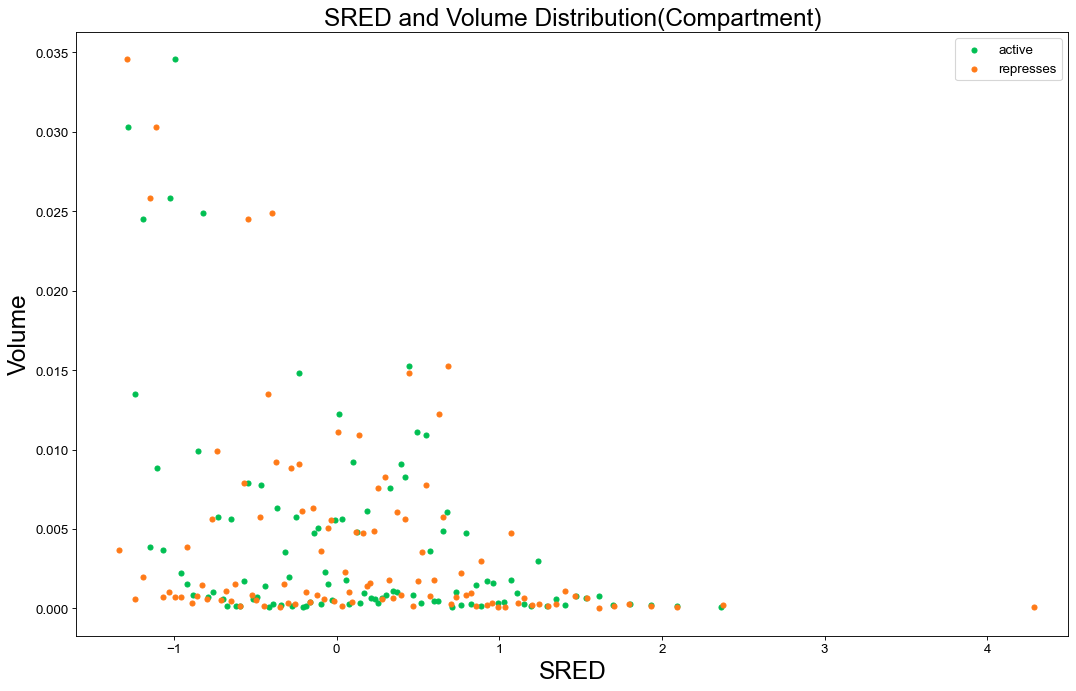

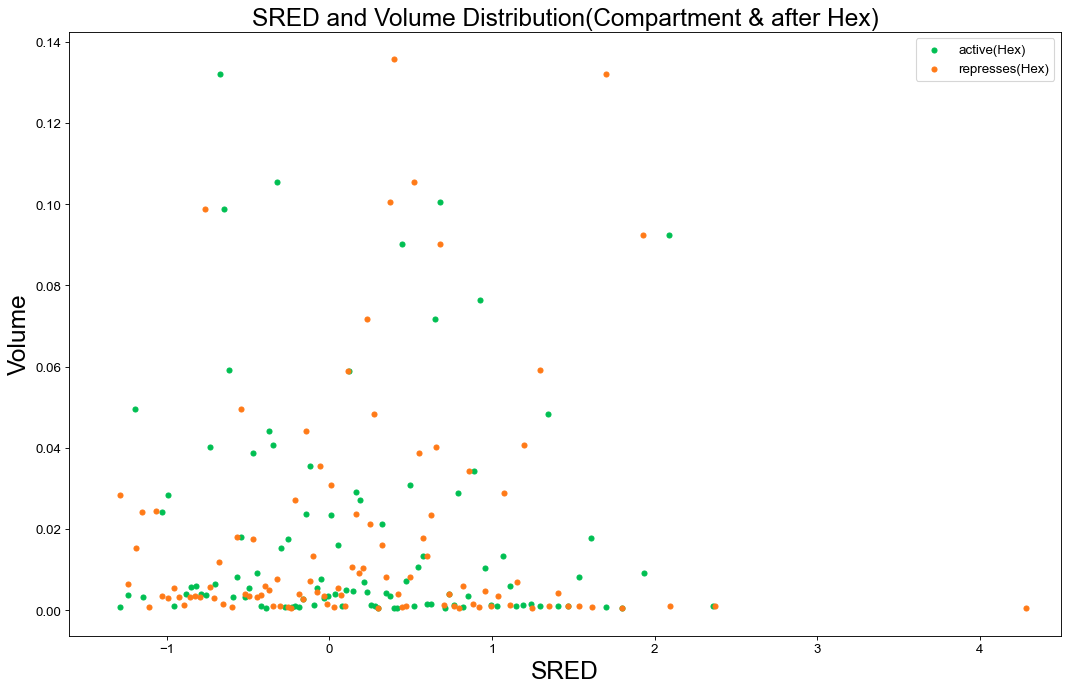

In [53]:
# 5MB 500KB
active_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC_5MB_new/result/HeLa_SDOC.tsv'
represses_SDOC_path = '/data1/lmh_data/MINE/GM12878_H3K9me3_H3K27me3/analyse/HeLa_H3K9me3_H3K27me3/experiment/SDOC_5MB_new/result/HeLa_SDOC.tsv'
Hex_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC_GSE138543_Hex5_5MB_new/result/HeLa_SDOC.tsv'

active_infos = pd.read_csv(active_SDOC_path, sep="\t", header=None)
represses_infos = pd.read_csv(represses_SDOC_path, sep="\t", header=None)
Hex_infos = pd.read_csv(Hex_SDOC_path, sep="\t", header=None)

def show(df, title, colors):
    very_large = 24; large = 22; med = 16; small = 12
    params = {'axes.titlesize': very_large,
              'legend.fontsize': med,
              'figure.figsize': (10, 10),
              'axes.labelsize': large,
              'axes.titlesize': large,
              'xtick.labelsize': large,
              'ytick.labelsize': large,
              'figure.titlesize': very_large,
              'lines.linewidth': 2}
    plt.rcParams.update(params)
    
    font = {'family': 'sans-serif', 'sans-serif': 'Arial'}
    plt.rc('font', **font)
    
    # Prepare Data 
    categories = np.unique(df['Category'])

    # Draw Plot for Each Category
    fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

    for i, category in enumerate(categories):
        plt.scatter('SRED', 'Volume', data=df.loc[df.Category==category, :], s=20, color=colors[category], label=str(category))
    
    # Decorations
    plt.gca().set(xlim=(-1.6, 4.5), xlabel='SRED', ylabel='Volume')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(title, fontsize=22)
    plt.legend(fontsize=12)
#     plt.savefig('figure_file/{}.pdf'.format(title))
    plt.show() 

_colors = {
    'active': COLORS[2],
    'represses': COLORS[3],
    'active(Hex)': COLORS[2],
    'represses(Hex)': COLORS[3],
}
    
# active_infos = active_infos.iloc[[1910, 1702, 1368, 153]]
active_infos['Category'] = 'active'
active_infos['Volume'] = active_infos.loc[:, 4]
active_infos['SRED'] = active_infos.loc[:, 5]

Hex_active_infos = Hex_infos.copy()
Hex_active_infos['Category'] = 'active(Hex)'
Hex_active_infos['Volume'] = Hex_active_infos.loc[:, 4]
Hex_active_infos['SRED'] = active_infos['SRED']

# represses_infos = represses_infos.iloc[[1284, 665, 2060, 448]]
represses_infos['Category'] = 'represses'
represses_infos['Volume'] = represses_infos.loc[:, 4]
represses_infos['SRED'] = represses_infos.loc[:, 5]

Hex_represses_infos = Hex_infos.copy()
Hex_represses_infos['Category'] = 'represses(Hex)'
Hex_represses_infos['Volume'] = Hex_represses_infos.loc[:, 4]
Hex_represses_infos['SRED'] = represses_infos['SRED']

show(pd.concat([active_infos, represses_infos], axis=0), 'SRED and Volume Distribution(Compartment)', _colors)
show(pd.concat([Hex_active_infos, Hex_represses_infos], axis=0), 'SRED and Volume Distribution(Compartment & after Hex)', _colors)


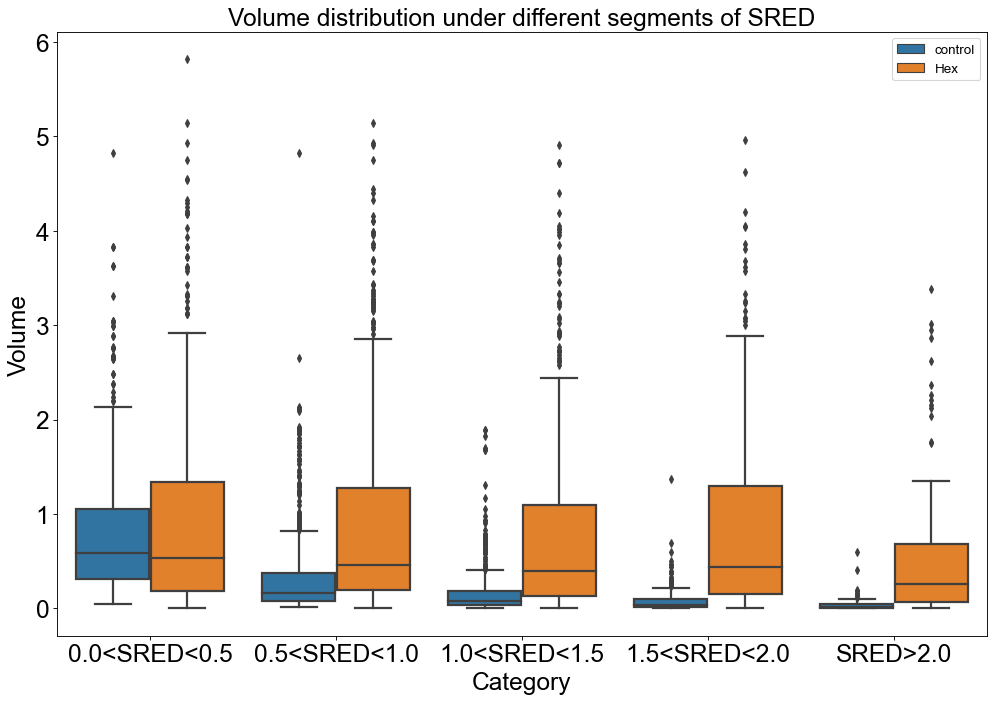

In [64]:
active_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC/result/HeLa_SDOC.tsv'
represses_SDOC_path = '/data1/lmh_data/MINE/GM12878_H3K9me3_H3K27me3/analyse/HeLa_H3K9me3_H3K27me3/experiment/SDOC/result/HeLa_SDOC.tsv'
Hex_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC_GSE138543_Hex5/result/HeLa_SDOC.tsv'

active_infos = pd.read_csv(active_SDOC_path, sep="\t", header=None)
represses_infos = pd.read_csv(represses_SDOC_path, sep="\t", header=None)
Hex_infos = pd.read_csv(Hex_SDOC_path, sep="\t", header=None)

def show(df, title, colors):
    very_large = 24; large = 22; med = 16; small = 12
    params = {'axes.titlesize': very_large,
              'legend.fontsize': med,
              'figure.figsize': (10, 10),
              'axes.labelsize': large,
              'axes.titlesize': large,
              'xtick.labelsize': large,
              'ytick.labelsize': large,
              'figure.titlesize': very_large,
              'lines.linewidth': 2}
    plt.rcParams.update(params)
    
    font = {'family': 'sans-serif', 'sans-serif': 'Arial'}
    plt.rc('font', **font)
    
    data = df.loc[(df.SRED>0)&(df.Volume>0), :].copy()
    _05 = data.loc[data.SRED<0.5, :].copy()
    _1 = data.loc[(data['SRED']>0.5)&(data['SRED']<1)].copy()
    _15 = data.loc[(data['SRED']>1)&(data['SRED']<1.5)].copy()
    _2 = data.loc[(data['SRED']>1.5)&(data['SRED']<2)].copy()
    _max = data.loc[data['SRED']>2].copy()

    _05['Category'] = '0.0<SRED<0.5'
    _1['Category'] = '0.5<SRED<1.0'
    _15['Category'] = '1.0<SRED<1.5'
    _2['Category'] = '1.5<SRED<2.0'
    _max['Category'] = 'SRED>2.0'
    data = pd.concat([_05, _1, _15, _2, _max], axis=0)
    
    plt.figure(figsize=(15,10), dpi=80)
    sns.boxplot(x='Category', y='Volume', data=data, hue='Experiment')

    # Decoration
    plt.title(title, fontsize=22)
    plt.legend(fontsize=12)
    plt.show()

_colors = {
    'active': COLORS[2],
    'represses': COLORS[3],
    'active(Hex)': COLORS[2],
    'represses(Hex)': COLORS[3],
}

active_infos['Volume'] = active_infos.loc[:, 4]
active_infos['SRED'] = active_infos.loc[:, 5]

Hex_active_infos = Hex_infos.copy()
Hex_active_infos['Volume'] = Hex_active_infos.loc[:, 4]
Hex_active_infos['SRED'] = active_infos['SRED']

represses_infos['Volume'] = represses_infos.loc[:, 4]
represses_infos['SRED'] = represses_infos.loc[:, 5]

Hex_represses_infos = Hex_infos.copy()
Hex_represses_infos['Volume'] = Hex_represses_infos.loc[:, 4]
Hex_represses_infos['SRED'] = represses_infos['SRED']

control_infos = pd.concat([active_infos, represses_infos], axis=0)
Hex_infos = pd.concat([Hex_active_infos, Hex_represses_infos], axis=0)
control_infos['Experiment']='control'
Hex_infos['Experiment']='Hex'

show(pd.concat([control_infos, Hex_infos], axis=0), 'Volume distribution under different segments of SRED', _colors)


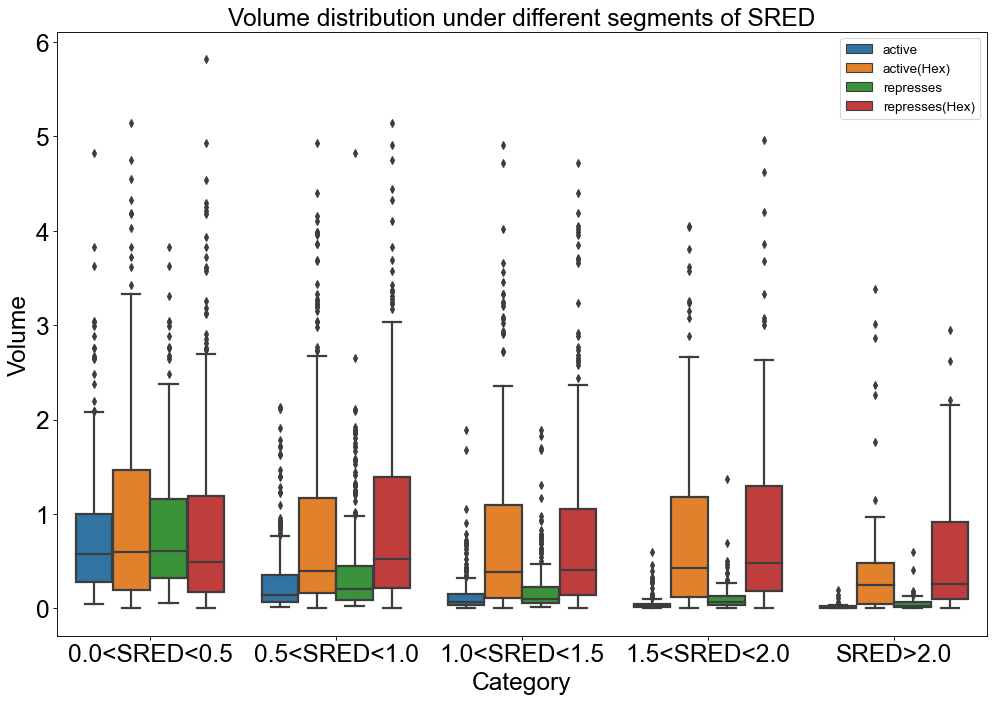

In [65]:
active_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC/result/HeLa_SDOC.tsv'
represses_SDOC_path = '/data1/lmh_data/MINE/GM12878_H3K9me3_H3K27me3/analyse/HeLa_H3K9me3_H3K27me3/experiment/SDOC/result/HeLa_SDOC.tsv'
Hex_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC_GSE138543_Hex5/result/HeLa_SDOC.tsv'

active_infos = pd.read_csv(active_SDOC_path, sep="\t", header=None)
represses_infos = pd.read_csv(represses_SDOC_path, sep="\t", header=None)
Hex_infos = pd.read_csv(Hex_SDOC_path, sep="\t", header=None)

def show(df, title, colors):
    very_large = 24; large = 22; med = 16; small = 12
    params = {'axes.titlesize': very_large,
              'legend.fontsize': med,
              'figure.figsize': (10, 10),
              'axes.labelsize': large,
              'axes.titlesize': large,
              'xtick.labelsize': large,
              'ytick.labelsize': large,
              'figure.titlesize': very_large,
              'lines.linewidth': 2}
    plt.rcParams.update(params)
    
    font = {'family': 'sans-serif', 'sans-serif': 'Arial'}
    plt.rc('font', **font)
    
    data = df.loc[(df.SRED>0)&(df.Volume>0), :].copy()
    _05 = data.loc[data.SRED<0.5, :].copy()
    _1 = data.loc[(data['SRED']>0.5)&(data['SRED']<1)].copy()
    _15 = data.loc[(data['SRED']>1)&(data['SRED']<1.5)].copy()
    _2 = data.loc[(data['SRED']>1.5)&(data['SRED']<2)].copy()
    _max = data.loc[data['SRED']>2].copy()

    _05['Category'] = '0.0<SRED<0.5'
    _1['Category'] = '0.5<SRED<1.0'
    _15['Category'] = '1.0<SRED<1.5'
    _2['Category'] = '1.5<SRED<2.0'
    _max['Category'] = 'SRED>2.0'
    data = pd.concat([_05, _1, _15, _2, _max], axis=0)
    
    plt.figure(figsize=(15,10), dpi=80)
    sns.boxplot(x='Category', y='Volume', data=data, hue='Experiment')

    # Decoration
    plt.title(title, fontsize=22)
    plt.legend(fontsize=12)
    plt.show()

_colors = {
    'active': COLORS[2],
    'represses': COLORS[3],
    'active(Hex)': COLORS[2],
    'represses(Hex)': COLORS[3],
}

active_infos['Volume'] = active_infos.loc[:, 4]
active_infos['SRED'] = active_infos.loc[:, 5]
active_infos['Experiment'] = 'active'

Hex_active_infos = Hex_infos.copy()
Hex_active_infos['Volume'] = Hex_active_infos.loc[:, 4]
Hex_active_infos['SRED'] = active_infos['SRED']
Hex_active_infos['Experiment'] = 'active(Hex)'

represses_infos['Volume'] = represses_infos.loc[:, 4]
represses_infos['SRED'] = represses_infos.loc[:, 5]
represses_infos['Experiment'] = 'represses'

Hex_represses_infos = Hex_infos.copy()
Hex_represses_infos['Volume'] = Hex_represses_infos.loc[:, 4]
Hex_represses_infos['SRED'] = represses_infos['SRED']
Hex_represses_infos['Experiment'] = 'represses(Hex)'

show(pd.concat([active_infos, Hex_active_infos, represses_infos, Hex_represses_infos], axis=0), 'Volume distribution under different segments of SRED', _colors)


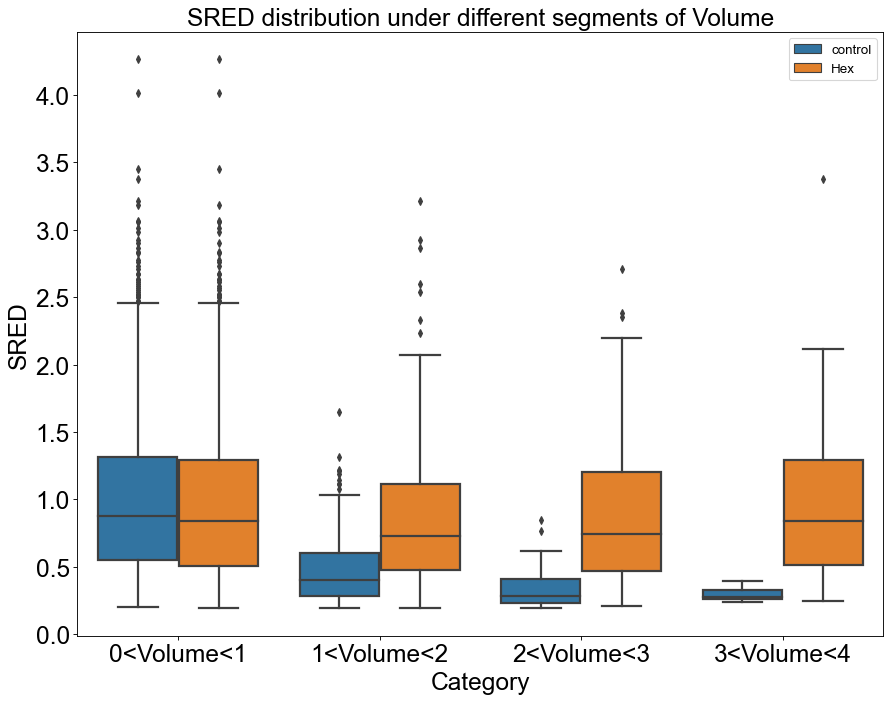

In [61]:
active_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC/result/HeLa_SDOC.tsv'
represses_SDOC_path = '/data1/lmh_data/MINE/GM12878_H3K9me3_H3K27me3/analyse/HeLa_H3K9me3_H3K27me3/experiment/SDOC/result/HeLa_SDOC.tsv'
Hex_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC_GSE138543_Hex5/result/HeLa_SDOC.tsv'

active_infos = pd.read_csv(active_SDOC_path, sep="\t", header=None)
represses_infos = pd.read_csv(represses_SDOC_path, sep="\t", header=None)
Hex_infos = pd.read_csv(Hex_SDOC_path, sep="\t", header=None)

def show(df, title, colors):
    very_large = 24; large = 22; med = 16; small = 12
    params = {'axes.titlesize': very_large,
              'legend.fontsize': med,
              'figure.figsize': (10, 10),
              'axes.labelsize': large,
              'axes.titlesize': large,
              'xtick.labelsize': large,
              'ytick.labelsize': large,
              'figure.titlesize': very_large,
              'lines.linewidth': 2}
    plt.rcParams.update(params)
    
    font = {'family': 'sans-serif', 'sans-serif': 'Arial'}
    plt.rc('font', **font)
    
    data = df.loc[(df.SRED>0)&(df.Volume>0), :].copy()
    _1 = data.loc[data.Volume<1, :].copy()
    _2 = data.loc[(data['Volume']>1)&(data['Volume']<2)].copy()
    _3 = data.loc[(data['Volume']>2)&(data['Volume']<3)].copy()
    _4 = data.loc[(data['Volume']>3)&(data['Volume']<4)].copy()

    _1['Category'] = '0<Volume<1'
    _2['Category'] = '1<Volume<2'
    _3['Category'] = '2<Volume<3'
    _4['Category'] = '3<Volume<4'
    data = pd.concat([_1, _2, _3, _4], axis=0)
    
    plt.figure(figsize=(13,10), dpi= 80)
    sns.boxplot(x='Category', y='SRED', data=data, hue='Experiment')

    # Decoration
    plt.title(title, fontsize=22)
    plt.legend(fontsize=12)
    plt.show()

_colors = {
    'active': COLORS[2],
    'represses': COLORS[3],
    'active(Hex)': COLORS[2],
    'represses(Hex)': COLORS[3],
}

active_infos['Volume'] = active_infos.loc[:, 4]
active_infos['SRED'] = active_infos.loc[:, 5]

Hex_active_infos = Hex_infos.copy()
Hex_active_infos['Volume'] = Hex_active_infos.loc[:, 4]
Hex_active_infos['SRED'] = active_infos['SRED']

represses_infos['Volume'] = represses_infos.loc[:, 4]
represses_infos['SRED'] = represses_infos.loc[:, 5]

Hex_represses_infos = Hex_infos.copy()
Hex_represses_infos['Volume'] = Hex_represses_infos.loc[:, 4]
Hex_represses_infos['SRED'] = represses_infos['SRED']

control_infos = pd.concat([active_infos, represses_infos], axis=0)
Hex_infos = pd.concat([Hex_active_infos, Hex_represses_infos], axis=0)
control_infos['Experiment']='control'
Hex_infos['Experiment']='Hex'

show(pd.concat([control_infos, Hex_infos], axis=0), 'SRED distribution under different segments of Volume', _colors)


In [5]:
active_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC/result/HeLa_SDOC.tsv'
represses_SDOC_path = '/data1/lmh_data/MINE/GM12878_H3K9me3_H3K27me3/analyse/HeLa_H3K9me3_H3K27me3/experiment/SDOC/result/HeLa_SDOC.tsv'
Hex_SDOC_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC_GSE138543_Hex5/result/HeLa_SDOC.tsv'

active_infos = pd.read_csv(active_SDOC_path, sep="\t", header=None)
represses_infos = pd.read_csv(represses_SDOC_path, sep="\t", header=None)
Hex_infos = pd.read_csv(Hex_SDOC_path, sep="\t", header=None)

def get_factor_nums(chip_seq_path, infos):
    infos['Factor_Peak_NUMS'] = 0
    with open(chip_seq_path)as f:
        for line in f:
            datas = line.strip().split()
            left, right = int(datas[1]), int(datas[2])
            infos.loc[infos[0]==datas[0]].loc[infos[1] < left].loc[infos[2] > right].index
            for index in infos.loc[infos[0]==datas[0]].loc[infos[1] < left].loc[infos[2] > right].index.tolist():
                infos.loc[index, "Factor_Peak_NUMS"] = infos.loc[index, "Factor_Peak_NUMS"] + 1
    return infos

active_infos = get_factor_nums('/data1/lmh_data/MINE/source/HeLa/POLR2A_peaks.bed', active_infos)
active_infos['Category'] = 'active'
active_infos['Volume'] = active_infos.loc[:, 4]
active_infos['SRED'] = active_infos.loc[:, 5]
active_infos['Factor_Peak_NUMS/Volume'] = active_infos['Factor_Peak_NUMS'] / active_infos['Volume']

represses_infos = get_factor_nums('/data1/lmh_data/MINE/source/HeLa/EZH2_peaks.bed', represses_infos)
represses_infos['Category'] = 'represses'
represses_infos['Volume'] = represses_infos.loc[:, 4]
represses_infos['SRED'] = represses_infos.loc[:, 5]
represses_infos['Factor_Peak_NUMS/Volume'] = represses_infos['Factor_Peak_NUMS'] / represses_infos['Volume']

active SRED mean: 0.9466682215215745
active Factor_Peak_NUMS/Volume mean: 243.27499835054132
represses SRED mean: 0.9257094872903792
represses Factor_Peak_NUMS/Volume mean: 14.850024454594504


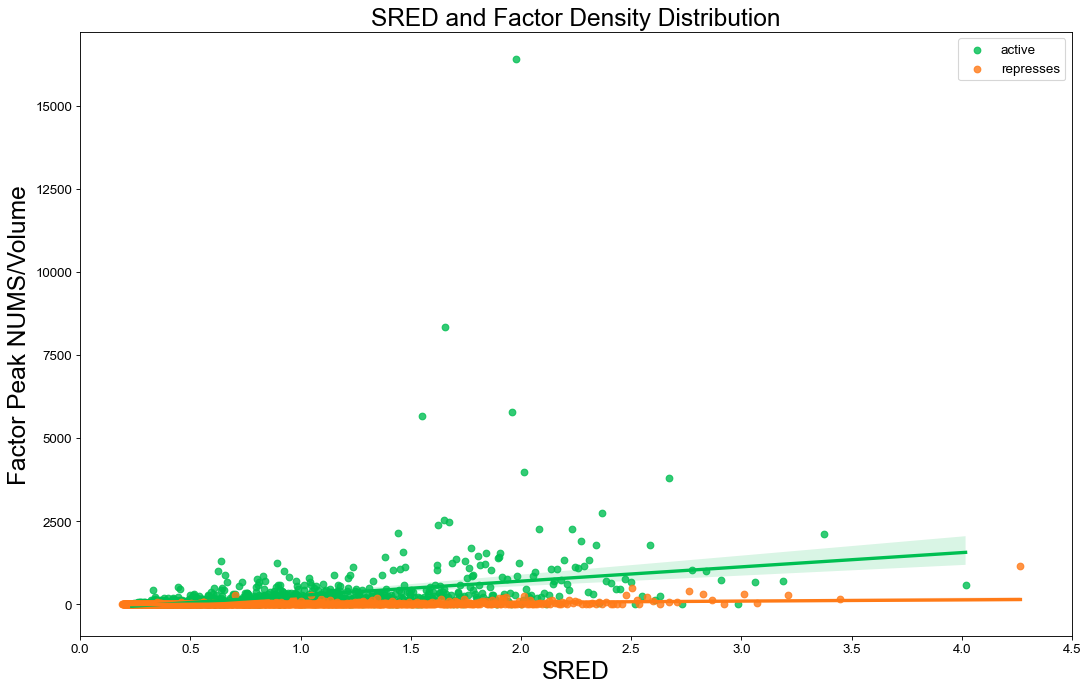

In [6]:
def histogram(df, title, colors):
    very_large = 24; large = 22; med = 16; small = 12
    params = {'axes.titlesize': very_large,
              'legend.fontsize': med,
              'figure.figsize': (10, 10),
              'axes.labelsize': large,
              'axes.titlesize': large,
              'xtick.labelsize': large,
              'ytick.labelsize': large,
              'figure.titlesize': very_large,
              'lines.linewidth': 2}
    plt.rcParams.update(params)
    
    font = {'family': 'sans-serif', 'sans-serif': 'Arial'}
    plt.rc('font', **font)
    
    # Prepare Data 
    categories = np.unique(df['Category'])

    # Draw Plot for Each Category
    fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

    for i, category in enumerate(categories):
        data = df.loc[df.Category==category, :]
        data = data.loc[data.SRED>0, :]
        print('{} SRED mean: {}'.format(category, data['SRED'].mean()))
        print('{} Factor_Peak_NUMS/Volume mean: {}'.format(category, data['Factor_Peak_NUMS/Volume'].mean()))
#         plt.scatter('SRED', 'Factor_Peak_NUMS/Volume', data=data, s=20, color=colors[category], label=str(category))
        sns.regplot(x='SRED', y='Factor_Peak_NUMS/Volume', data=data, color=colors[category], label=str(category))
        
    # Decorations
    plt.gca().set(xlim=(0, 4.5), xlabel='SRED', ylabel='Factor Peak NUMS/Volume')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(title, fontsize=22)
    plt.legend(fontsize=12)
    plt.savefig('figure_file/{}.pdf'.format(title))
    plt.show()

_colors = {
    'active': COLORS[2],
    'represses': COLORS[3],
}

histogram(pd.concat([active_infos, represses_infos], axis=0), 'SRED and Factor Density Distribution', _colors)


In [10]:
_active_infos = active_infos.loc[active_infos.SRED>2.5].copy()
_active_infos = _active_infos.sort_values('SRED', ascending=False)
_active_infos

,0,1,2,3,4,5,Factor_Peak_NUMS,Category,Volume,SRED,Factor_Peak_NUMS/Volume
1958,chr5,59180000,59380000,72,0.005108,4.016806,3,active,0.005108,4.016806,587.329984
593,chr12,56470000,56510000,12,0.000946,3.375913,2,active,0.000946,3.375913,2113.995160
513,chr11,123110000,123250000,57,0.007218,3.186579,5,active,0.007218,3.186579,692.754188
311,chr10,35120000,35230000,36,0.006047,3.060941,4,active,0.006047,3.060941,661.531079
520,chr11,128870000,128960000,25,0.004496,2.982570,0,active,0.004496,2.982570,0.000000
306,chr10,30390000,30590000,54,0.011183,2.905093,8,active,0.011183,2.905093,715.397757
1745,chr3,124750000,124910000,37,0.009976,2.838488,10,active,0.009976,2.838488,1002.420330
217,chr1,201890000,201980000,17,0.004852,2.776430,5,active,0.004852,2.776430,1030.548658
2373,chr8,28320000,28360000,4,0.001300,2.728189,0,active,0.001300,2.728189,0.000000
534,chr12,6280000,6320000,4,0.001313,2.671139,5,active,0.001313,2.671139,3807.136295


In [7]:
_active_infos = active_infos.copy()
_active_infos['SRED'] -= 0.9466682215215745
_active_infos['Factor_Peak_NUMS/Volume'] -= 243.27499835054132
_active_infos['score'] = abs(_active_infos['SRED'] * _active_infos['Factor_Peak_NUMS/Volume'])
_active_infos

,0,1,2,3,4,5,Factor_Peak_NUMS,Category,Volume,SRED,Factor_Peak_NUMS/Volume,score
0,chr1,2190000,3430000,3,0.153494,0.501613,26,active,0.153494,-0.445056,-73.887570,32.884081
1,chr1,3430000,5990000,0,0.488190,-0.544654,17,active,0.488190,-1.491323,-208.452484,310.869896
2,chr1,5990000,6700000,17,0.112054,1.092796,36,active,0.112054,0.146127,77.998305,11.397692
3,chr1,6700000,7650000,3,0.113645,0.560631,9,active,0.113645,-0.386037,-164.081000,63.341399
4,chr1,7650000,7970000,9,0.035545,1.292355,5,active,0.035545,0.345686,-102.606300,35.469598
...,...,...,...,...,...,...,...,...,...,...,...,...
2604,chr9,136730000,136790000,0,0.007350,-0.544654,0,active,0.007350,-1.491323,-243.274998,362.801498
2605,chr9,136790000,136940000,0,0.038754,-0.544654,34,active,0.038754,-1.491323,634.058715,945.586078
2606,chr9,136940000,137120000,0,0.058019,-0.544654,21,active,0.058019,-1.491323,118.674646,176.982179
2607,chr9,137120000,137280000,0,0.041934,-0.544654,34,active,0.041934,-1.491323,567.527475,846.366538


In [8]:
_active_infos1 = _active_infos.loc[_active_infos.SRED>0, :].loc[_active_infos['Factor_Peak_NUMS/Volume']>0, :].sort_values('score', ascending=False)
_active_infos2 = _active_infos.loc[_active_infos.SRED>0, :].loc[_active_infos['Factor_Peak_NUMS/Volume']<0, :].sort_values('score', ascending=False)
_active_infos3 = _active_infos.loc[_active_infos.SRED<0, :].loc[_active_infos['Factor_Peak_NUMS/Volume']>0, :].sort_values('score', ascending=False)
_active_infos4 = _active_infos.loc[_active_infos.SRED<0, :].loc[_active_infos['Factor_Peak_NUMS/Volume']<0, :].sort_values('score', ascending=False)
